# PCA: Dimensionality Reduction & Visualization

This notebook demonstrates how to use Principal Component Analysis (PCA) to:

- Find the directions of maximum variance in data (principal components)
- Project data onto those components (intuition with 2D synthetic data)
- Reduce dimensionality for visualization and analysis (Iris dataset 4D → 2D)

Why PCA?
- Compress features while preserving most information (variance)
- Remove redundancy in correlated features
- Enable visualization of high-dimensional data in 2D/3D


In [ ]:
# Imports (NumPy, plotting, PCA, scaling, datasets)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Notes:
# - Matplotlib is used for all visualizations.
# - StandardScaler standardizes features (mean=0, std=1), which is
#   recommended before PCA so features on larger scales don’t dominate.

## Part I: PCA on Synthetic 2D Data
We generate a 2D dataset with correlated features. PCA will identify the direction of greatest variance (PC1) and the orthogonal direction (PC2). We’ll visualize the original points and their projections onto each component to build intuition.

In [ ]:
# Generate correlated 2D data
rng = np.random.default_rng(42)  # fixed seed for reproducibility
mean = np.array([0.0, 0.0])
# Covariance matrix: variances on diagonal, covariance off-diagonal
cov = np.array([[3.0, 2.0],
                [2.0, 2.0]])
X = rng.multivariate_normal(mean, cov, size=200)
X.shape  # (n_samples, n_features)

(200, 2)

In [ ]:
# Fit PCA (2 components) and retrieve components/variance
pca = PCA(n_components=2)
_ = pca.fit_transform(X)  # fit learns directions; transform projects points
components = pca.components_   # shape (2, 2): rows are PC1 and PC2 direction vectors
explained = pca.explained_variance_ratio_  # fraction of total variance per PC
components, explained

(array([[ 0.79971292,  0.60038259],
        [-0.60038259,  0.79971292]]),
 array([0.92406212, 0.07593788]))

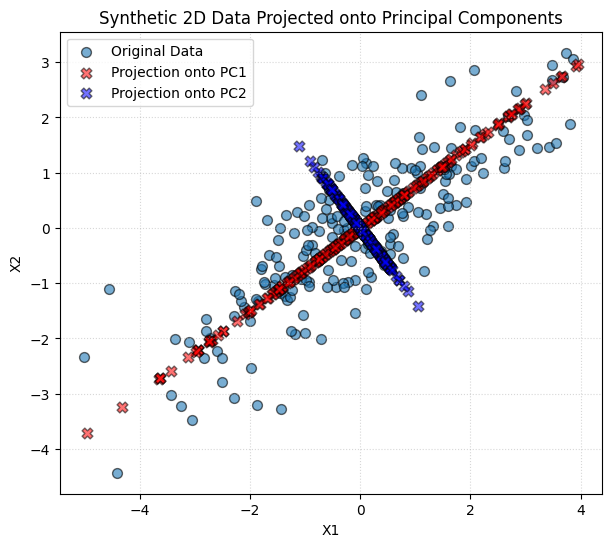

In [ ]:
# Project points onto PC1 and PC2 and visualize
# Dot product gives coordinates along each PC direction
proj_pc1 = np.dot(X, components[0])
proj_pc2 = np.dot(X, components[1])

# Reconstruct the projection vectors back in original 2D space
x_pc1 = proj_pc1 * components[0, 0]
y_pc1 = proj_pc1 * components[0, 1]
x_pc2 = proj_pc2 * components[1, 0]
y_pc2 = proj_pc2 * components[1, 1]

plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], label='Original Data', ec='k', s=50, alpha=0.6)
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=60, alpha=0.55, label='Projection onto PC1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=60, alpha=0.55, label='Projection onto PC2')
plt.title('Synthetic 2D Data Projected onto Principal Components')
plt.xlabel('X1'); plt.ylabel('X2')
plt.axis('equal'); plt.grid(True, ls=':', alpha=0.5); plt.legend()
plt.show()

## Part II: PCA on the Iris Dataset (4D → 2D)
We standardize all 4 features (sepal length/width, petal length/width), reduce to 2 principal components, and visualize the classes in 2D. Standardization ensures each feature contributes fairly to PCA.

In [ ]:
# Load and standardize Iris data
iris = datasets.load_iris()
X = iris.data  # (150, 4)
y = iris.target
target_names = iris.target_names

# Standardize: center (mean=0) and scale (std=1)
X_scaled = StandardScaler().fit_transform(X)
X.shape, X_scaled.shape, target_names

((150, 4),
 (150, 4),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [ ]:
# Reduce to 2 principal components
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_scaled)
# Return shape and total variance retained by PC1+PC2 (percentage)
X_pca.shape, 100 * pca2.explained_variance_ratio_.sum()

((150, 2), 95.81320720000166)

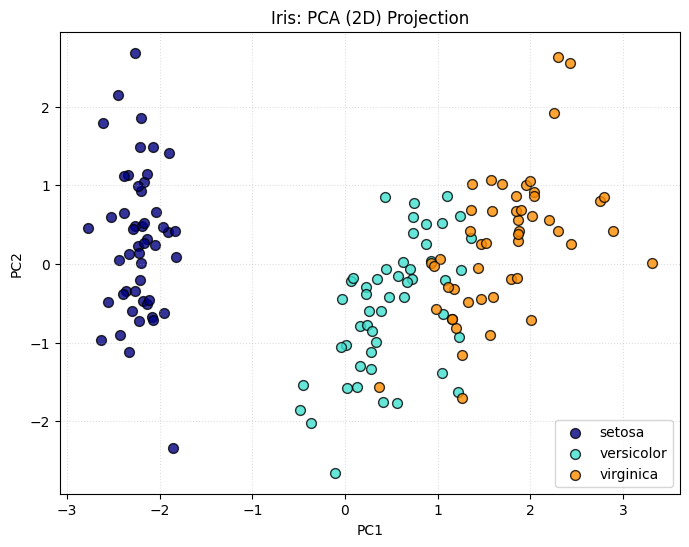

In [7]:
# Scatter plot in PC space by species
colors = ['navy', 'turquoise', 'darkorange']
plt.figure(figsize=(8,6))
for color, i, name in zip(colors, [0,1,2], target_names):
    plt.scatter(X_pca[y==i,0], X_pca[y==i,1], color=color, s=50, ec='k', alpha=0.8, label=name)
plt.title('Iris: PCA (2D) Projection')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(loc='best', frameon=True); plt.grid(True, ls=':', alpha=0.4)
plt.show()

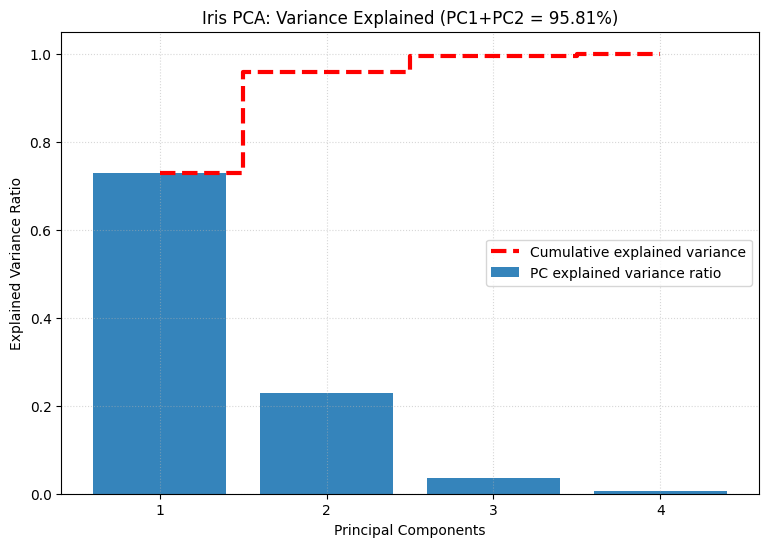

In [ ]:
# Explained variance for all 4 components and cumulative curve
pca_full = PCA()  # keep all components
_ = pca_full.fit_transform(X_scaled)
ev_r = pca_full.explained_variance_ratio_
cum = np.cumsum(ev_r)

x = np.arange(1, len(ev_r)+1)
plt.figure(figsize=(9,6))
plt.bar(x, ev_r, alpha=0.9, label='PC explained variance ratio')
plt.step(x, cum, where='mid', ls='--', lw=3, color='red', label='Cumulative explained variance')
plt.xticks(x); plt.xlabel('Principal Components'); plt.ylabel('Explained Variance Ratio')
plt.title(f'Iris PCA: Variance Explained (PC1+PC2 = {100*pca2.explained_variance_ratio_.sum():.2f}%)')
plt.legend(); plt.grid(True, ls=':', alpha=0.5); plt.show()

### Notes & Tips
- PC1 is the direction of maximum variance; PC2 is orthogonal and carries the next most variance.
- The Iris 2D scatter shows class separation mainly along PC1; some overlap between versicolor/virginica is expected.
- Use the cumulative curve to pick the number of PCs that meet your variance-retention goal (e.g., 95%).
- 100% variance typically requires all original components; reducing dimensions inevitably loses some variance.
- Always standardize features before PCA when they’re on different scales.